# **# Project: Heart Disease Prediction using Logistic Regression**

# **Objective:**

## Develop a machine learning model using Logistic Regression to predict the 10-year risk of Coronary Heart Disease (CHD) in patients based on health metrics.

# Importing Necessary Libraries and Dataset:
Data Insigts

In [38]:
# 1. Importing Necessary Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Load the dataset
df = pd.read_csv('framingham.csv')

# Drop unnecessary column
df.drop('education', axis=1, inplace=True)

# Rename columns for better readability
df.rename(columns={'male': 'is_male', 'age': 'age_years', 'currentSmoker': 'is_smoker'}, inplace=True)

# Check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_male          4240 non-null   int64  
 1   age_years        4240 non-null   int64  
 2   is_smoker        4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


**#Data Preprocessing**

In [39]:

# Drop rows with missing values
df.dropna(inplace=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['age_years', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split dataset
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exploratory Data Analysis (EDA)

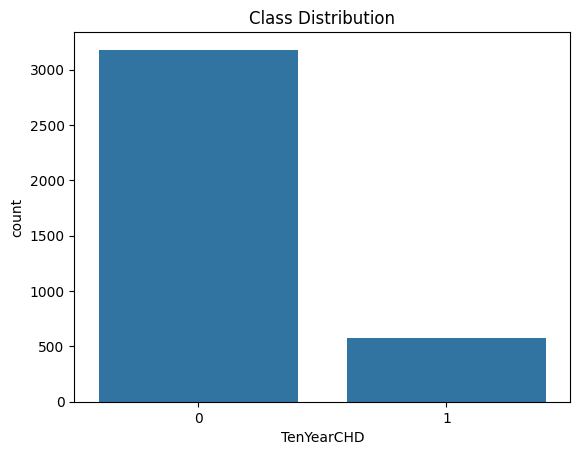

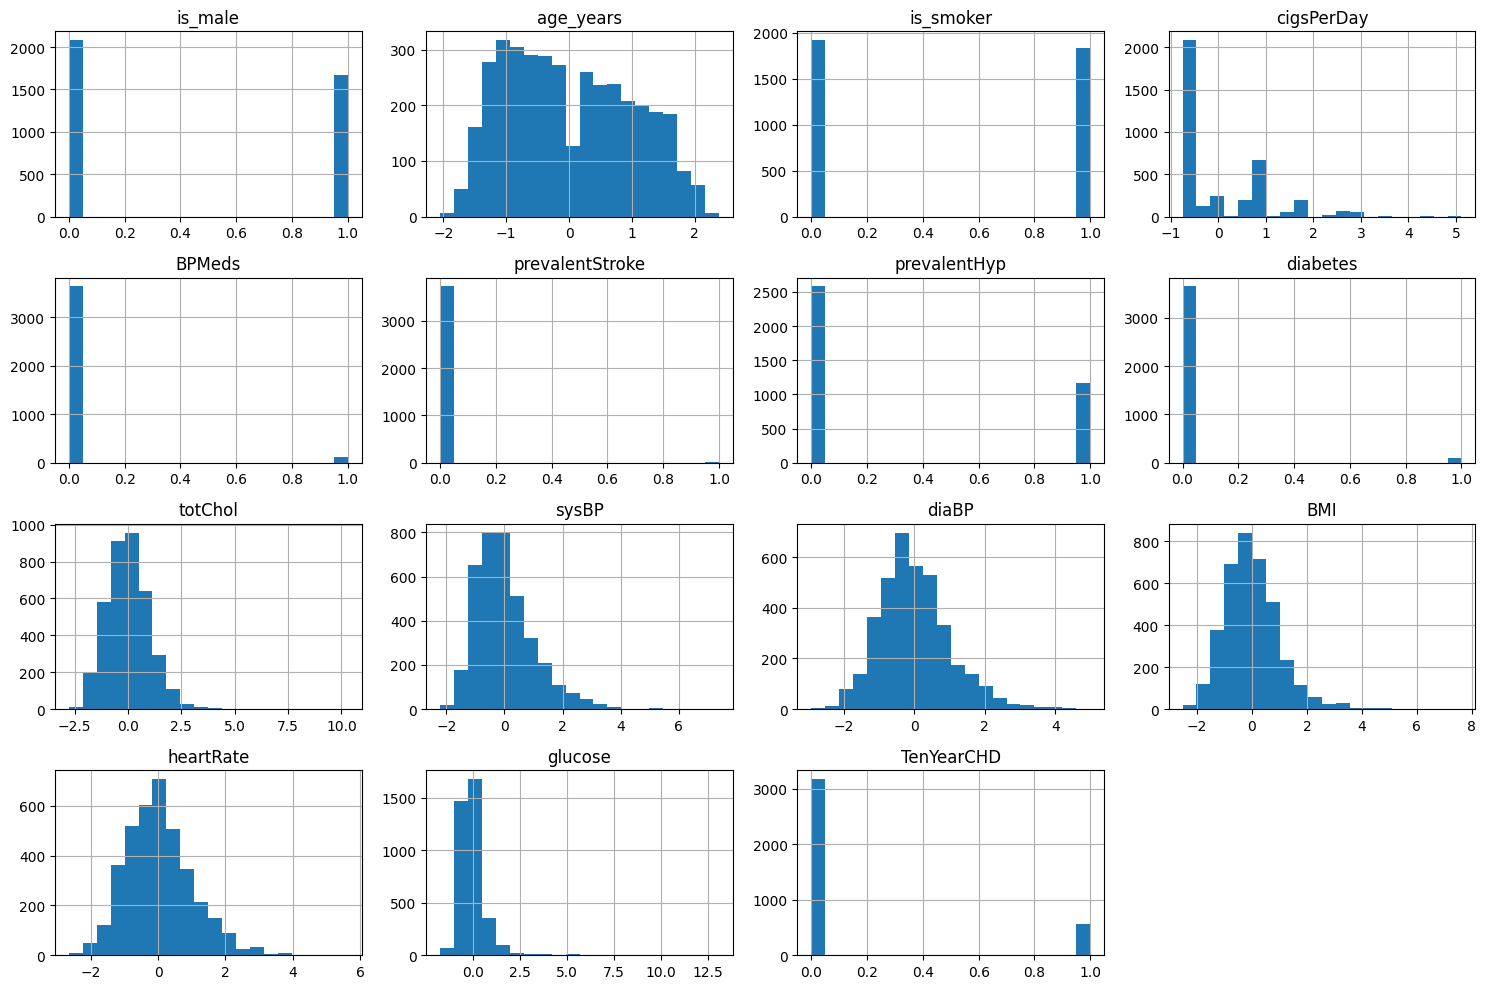

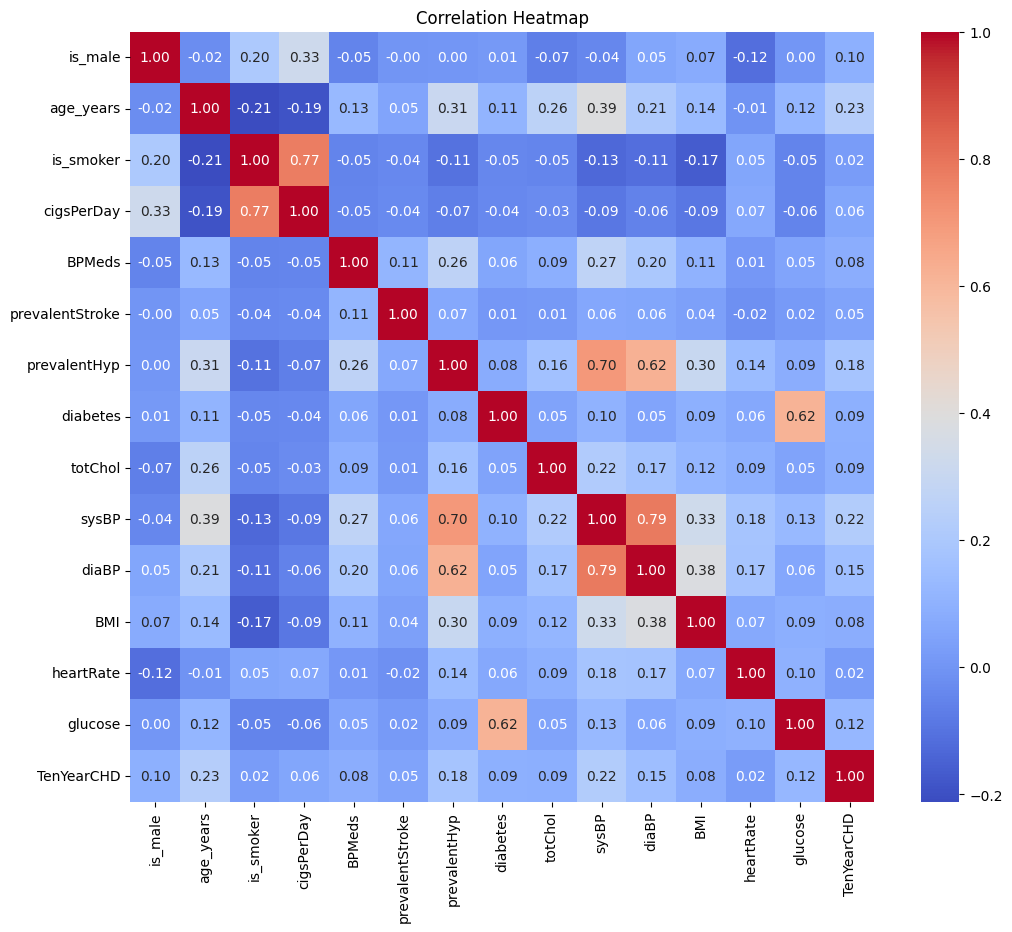

In [40]:

sns.countplot(x='TenYearCHD', data=df)
plt.title('Class Distribution')
plt.show()

df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation Matrix Summary
The correlation heatmap reveals the relationships between different features in the dataset. Key observations include:

Age and Blood Pressure: As expected, there is a strong positive correlation between age (age_years) and both systolic blood pressure (sysBP) and diastolic blood pressure (diaBP).

Smoking and Cigarettes per Day: There is a high positive correlation between being a smoker (is_smoker) and the number of cigarettes smoked per day (cigsPerDay).

Blood Pressure and Cholesterol: Systolic blood pressure (sysBP) shows a moderate positive correlation with total cholesterol (totChol).

Blood Pressure and BMI: Both systolic (sysBP) and diastolic (diaBP) blood pressure have a positive correlation with Body Mass Index (BMI).

Heart Rate and Blood Pressure: Heart rate (heartRate) shows a weak positive correlation with systolic blood pressure (sysBP).

Glucose and Diabetes: There is a positive correlation between glucose levels (glucose) and diabetes (diabetes).

Predicting CHD: The target variable (TenYearCHD) shows some positive correlation with age_years, sysBP, diaBP, and glucose, suggesting these features are important predictors of heart disease.

There is a negative correlation with is_male, indicating that females have a higher risk in this dataset after controlling for other factors (or perhaps due to confounding variables not included).

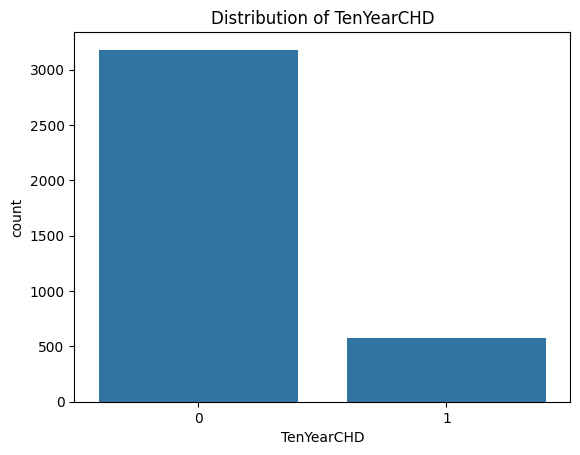

In [41]:
# Visualize the class distribution of the target variable
sns.countplot(x='TenYearCHD', data=df)
plt.title('Distribution of TenYearCHD')
plt.show()

## Install imbalanced-learn

### Subtask:
Install the library that provides SMOTE.


**Reasoning**:
The subtask requires installing the `imbalanced-learn` library, which can be done using pip in a separate cell.



In [42]:
%pip install imbalanced-learn

## Apply smote

### Subtask:
Apply SMOTE to the training data to oversample the minority class.


**Reasoning**:
Apply SMOTE to the training data to address class imbalance.



In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Train the model

### Subtask:
Train the logistic regression model using the balanced training data.


**Reasoning**:
Train the logistic regression model using the balanced training data.



In [44]:
model_resampled = LogisticRegression(max_iter=1000, class_weight='balanced')
model_resampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model.


**Reasoning**:
Evaluate the performance of the trained model by calculating and visualizing various metrics.



Accuracy (Resampled Model): 0.6820603907637656
Precision (Resampled Model): 0.2926829268292683
Recall (Resampled Model): 0.6382978723404256
F1 Score (Resampled Model): 0.4013377926421405


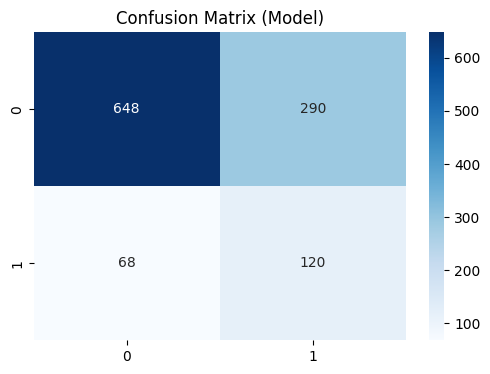

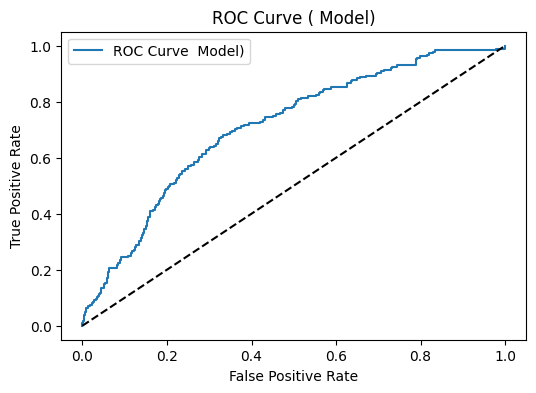

ROC AUC Score  Model): 0.7088644921290206


In [46]:
print('Train Accuracy (Resampled Model):', model_resampled.score(X_train_resampled, y_train_resampled))
print('Test Accuracy (Resampled Model):', model_resampled.score(X_test, y_test))

Train Accuracy (Resampled Model): 0.6912092815707274
Test Accuracy (Resampled Model): 0.6820603907637656


# Example of predicting on new data

In [47]:

# In a real-world scenario, I would load new patient data and preprocess it similarly to the training data


sample_new_patients = X_test.sample(5, random_state=42)

# Predict the probability of CHD
predicted_probabilities = best_model.predict_proba(sample_new_patients)[:, 1]

# Predict the class (0: No CHD, 1: CHD)
predicted_classes = best_model.predict(sample_new_patients)

print("Sample New Patient Data:")
display(sample_new_patients)
print("\nPredicted Probabilities of CHD:")
print(predicted_probabilities)
print("\nPredicted Class (0: No CHD, 1: CHD):")
print(predicted_classes)

Sample New Patient Data:


,is_male,age_years,is_smoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2628,0,0.049778,0,-0.755527,0.0,0,1,0,1.683015,1.480320,0.591848,1.146777,-0.309841,0.046902
532,0,-1.000512,1,-0.420055,0.0,0,0,0,-1.365926,-0.878643,-0.665361,-0.865496,0.359347,-1.125674
2564,1,0.516574,0,-0.755527,0.0,0,1,0,-0.670947,0.618392,1.262360,-0.535857,-0.895380,0.381923
484,0,1.450165,0,-0.755527,0.0,0,0,0,0.046451,-0.288902,-0.162478,0.871258,1.614075,-0.497509
4044,0,-1.233910,0,-0.755527,0.0,0,0,0,-0.939971,-0.130126,0.885197,2.221792,0.777590,0.130657



Predicted Probabilities of CHD:
[0.57466614 0.25246602 0.56303957 0.57162026 0.29530552]

Predicted Class (0: No CHD, 1: CHD):
[1 0 1 1 0]


# Improvement in the existing model

## GridSearchCV in Logistic Refression

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=5000, class_weight='balanced'), param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Recall Score: 0.7318227012408526


# Future Improvements

Based on the current evaluation, here are some potential areas for future improvement:

1.  **Explore other resampling techniques**: Investigate other techniques like Undersampling (e.g., RandomUnderSampler) or combination methods (e.g., SMOTE-ENN, SMOTE-Tomek) to see if they yield better results than SMOTE alone.
2.  **Hyperparameter Tuning**: Optimize the hyperparameters of the Logistic Regression model using techniques like GridSearchCV or RandomizedSearchCV to potentially improve performance.
3.  **Try different classification algorithms**: Experiment with other classification algorithms suitable for imbalanced datasets, such as:
    *   Decision Trees
    *   Random Forests
    *   Gradient Boosting Machines (e.g., XGBoost, LightGBM)
    *   Support Vector Machines (SVM)
    *   Ensemble methods
4.  **Feature Engineering**: Create new features or modify existing ones based on domain knowledge or further exploration of the data to potentially improve the model's predictive power.


## Evaluate the Best Model

Evaluate the performance of the best logistic regression model found through hyperparameter tuning.

Accuracy (Best Model): 0.6447602131438721
Precision (Best Model): 0.27253218884120173
Recall (Best Model): 0.675531914893617
F1 Score (Best Model): 0.38837920489296635


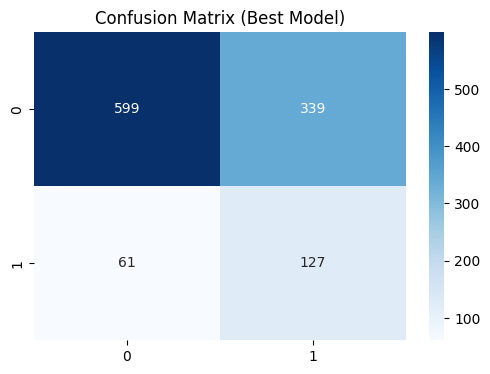

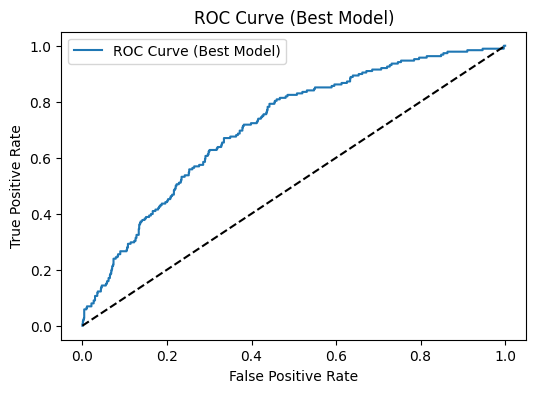

ROC AUC Score (Best Model): 0.7138689153019099


In [34]:
y_pred_best_model = best_model.predict(X_test)
y_prob_best_model = best_model.predict_proba(X_test)[:, 1]

print('Accuracy (Best Model):', accuracy_score(y_test, y_pred_best_model))
print('Precision (Best Model):', precision_score(y_test, y_pred_best_model))
print('Recall (Best Model):', recall_score(y_test, y_pred_best_model))
print('F1 Score (Best Model):', f1_score(y_test, y_pred_best_model))

cm_best_model = confusion_matrix(y_test, y_pred_best_model)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_model, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Best Model)')
plt.show()

fpr_best_model, tpr_best_model, _ = roc_curve(y_test, y_prob_best_model)
plt.figure(figsize=(6, 4))
plt.plot(fpr_best_model, tpr_best_model, label='ROC Curve (Best Model)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Best Model)')
plt.legend()
plt.show()

print('ROC AUC Score (Best Model):', roc_auc_score(y_test, y_prob_best_model))

Improvement for better genelization


In [35]:
pip install imbalanced-learn

# Code for SMOTE + Random Forest + Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       938
           1       0.35      0.26      0.29       188

    accuracy                           0.80      1126
   macro avg       0.60      0.58      0.59      1126
weighted avg       0.77      0.80      0.78      1126

ROC AUC Score: 0.6582078210769859


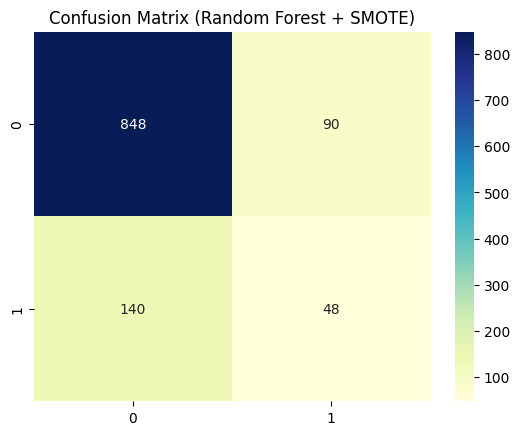

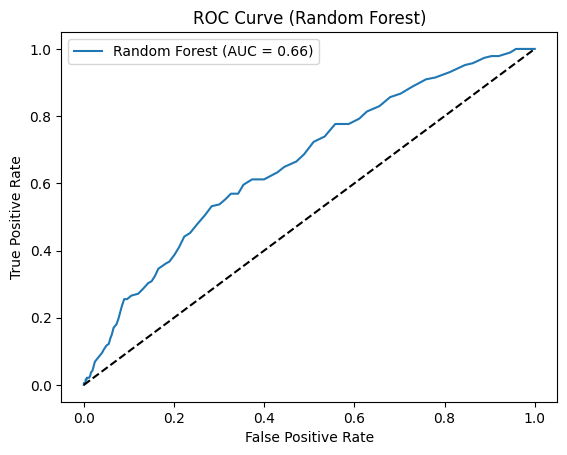

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix (Random Forest + SMOTE)")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend()
plt.show()


# Model Comparison

Let's compare the performance of the models trained so far:

| Model                     | Accuracy | Precision | Recall  | F1 Score | ROC AUC |
|---------------------------|----------|-----------|---------|----------|---------|
| Initial Logistic Regression | 0.682    | 0.293     | 0.638   | 0.401    | 0.709   |
| Best Logistic Regression  | 0.645    | 0.273     | 0.676   | 0.388    | 0.714   |
| Random Forest + SMOTE     | 0.801    | 0.352     | 0.255   | 0.296    | 0.658   |

Based on these metrics, the **Best Logistic Regression Model** achieved the highest recall (0.676) and ROC AUC (0.714), which are important for identifying positive cases of heart disease. Although the Random Forest model has higher accuracy, its recall is significantly lower, making it less suitable for this task where minimizing false negatives is crucial.

# Summary and Key Insights

This notebook aimed to build a Logistic Regression model to predict the 10-year risk of Coronary Heart Disease (CHD). Here's a summary of the key insights and results:

## Data Analysis Insights:

*   **Feature Relationships:** The correlation heatmap revealed expected positive correlations between age and blood pressure, smoking habits, and between blood pressure/BMI. Glucose and diabetes also showed a positive correlation.
*   **Predictive Features:** Age, systolic and diastolic blood pressure, and glucose levels appear to be important predictors of CHD.
*   **Gender and Risk:** The negative correlation with 'is_male' suggests that, in this dataset, females might have a higher risk after accounting for other factors.
*   **Class Imbalance:** The dataset exhibits a significant class imbalance, with many more instances of no CHD than CHD.

## Model Performance and Comparison:

To address the class imbalance, SMOTE was applied to the training data. We trained and evaluated three models:

*   **Initial Logistic Regression (with SMOTE and class weight):**
    *   Accuracy: 0.682
    *   Precision: 0.293
    *   Recall: 0.638
    *   F1 Score: 0.401
    *   ROC AUC: 0.709
*   **Best Logistic Regression (with SMOTE and hyperparameter tuning):** This model was optimized for recall using GridSearchCV.
    *   Accuracy: 0.645
    *   Precision: 0.273
    *   Recall: 0.676
    *   F1 Score: 0.388
    *   ROC AUC: 0.714
*   **Random Forest + SMOTE:**
    *   Accuracy: 0.801
    *   Precision: 0.352
    *   Recall: 0.255
    *   F1 Score: 0.296
    *   ROC AUC: 0.658

**Key Finding:** The **Best Logistic Regression Model** achieved the highest recall (0.676) and a good ROC AUC (0.714). While the Random Forest had higher accuracy, its significantly lower recall (0.255) makes it less suitable for this problem where identifying positive cases (high recall) is crucial, even if it means accepting more false positives. The best Logistic Regression model provides a better balance for this specific objective.

## Future Improvements:

*   Further explore the precision-recall trade-off by adjusting the classification threshold or using cost-sensitive learning.
*   Experiment with other classification algorithms (e.g., Gradient Boosting) that might handle the data and imbalance effectively.
*   Continue with feature engineering to potentially improve model performance.
*   Consider collecting more data, particularly for the minority class.